# Citation

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

Context
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Figure S6. Illustrative Examples of Chest X-Rays in Patients with Pneumonia, Related to Figure 6
The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

Acknowledgements
Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

enter image description here

Inspiration
Automated methods to detect and classify human diseases from medical images.

# Setup Environment

In [1]:
# import libraries
from fastai.vision.all import *

# set path to images
path = Path('./data/train_data')

# unlink broken images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

# Train Model (No Data Augmentation)

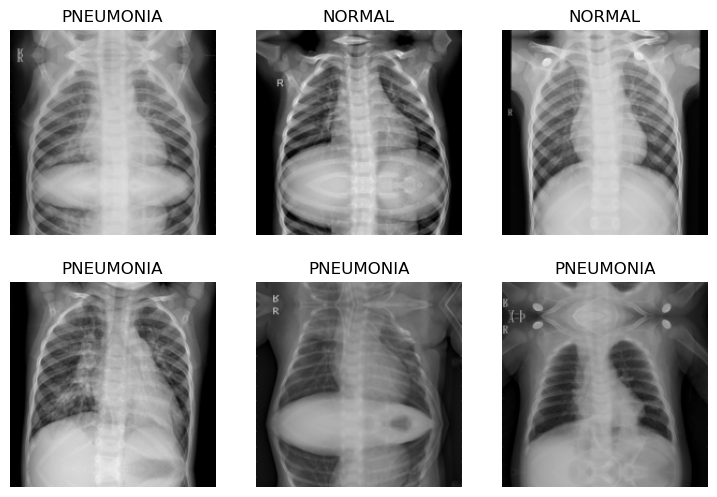

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='pad')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [4]:
learn_rn18 = vision_learner(dls, resnet18, metrics=error_rate)
learn_rn18.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.411098,0.187161,0.058219,02:54


epoch,train_loss,valid_loss,error_rate,time
0,0.204254,0.132870,0.046233,03:21
1,0.105834,0.079152,0.028253,03:13
2,0.066683,0.078996,0.022260,03:14


In [5]:
learn_rn34 = vision_learner(dls, resnet34, metrics=error_rate)
learn_rn34.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.450809,0.198645,0.069349,03:13


epoch,train_loss,valid_loss,error_rate,time
0,0.178522,0.095740,0.034247,03:22
1,0.103431,0.075477,0.029110,03:41
2,0.059946,0.065721,0.021404,03:36


# Analyze Better Model

In [10]:
learn = learn_rn34

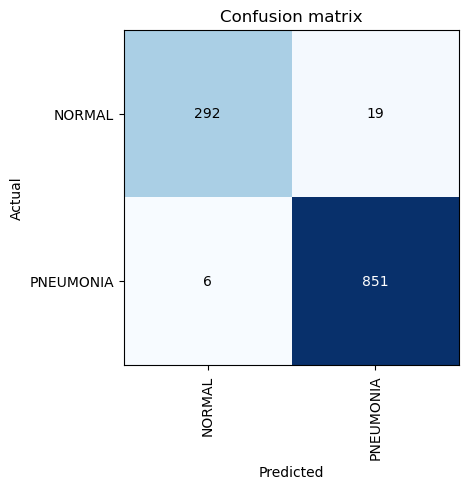

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

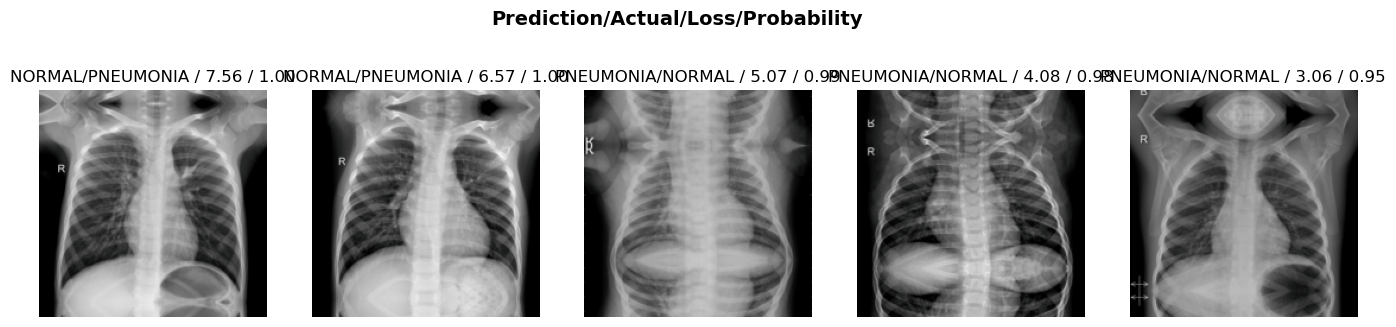

In [13]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

# Clean Data for Better Model

In [ ]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# Execute data cleaning decisions
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Retrain Model on Cleaned Data

In [ ]:
# Using the better performing ResNet model
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

# Export Model

In [14]:
learn.export('model.pkl')